In [1]:

import pandas as pd 
import matplotlib.pyplot as plt 
import tbcontrol
import control
import numpy as np
tbcontrol.expectversion("0.1.10")
%matplotlib inline
import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact


lugar de las raicez para la primer toma de datos 


In [2]:
a0 = pd.read_csv('C:\\Users\\jgall\\OneDrive\\Documentos\\ControlAnalogo\\simon1.csv')
a = a0 [a0['Tiempo'] > 19 ] 
a

,Tiempo,Referencia,Error,Señal de control,Salida
20,20.0,80,76.925638,76.925638,3.074362
21,21.0,80,76.872064,76.872064,3.127936
22,22.0,80,75.314073,75.314073,4.685927
23,23.0,80,72.995909,72.995909,7.004091
24,24.0,80,70.905073,70.905073,9.094927
...,...,...,...,...,...
116,116.0,80,64.719443,64.719443,15.280557
117,117.0,80,64.733922,64.733922,15.266078
118,118.0,80,64.744058,64.744058,15.255942
119,119.0,80,64.728130,64.728130,15.271870


In [6]:
time = a["Tiempo"]-20
salida = a["Salida"]
escalon = a["Referencia"]

Text(0, 0.5, 'caudal')

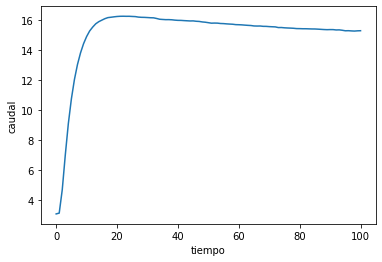

In [7]:
plt.plot(time,salida)
plt.xlabel("tiempo")
plt.ylabel("caudal")

Text(0, 0.5, 'escalon')

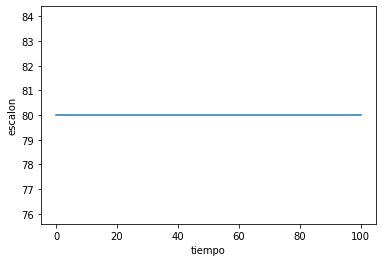

In [8]:
plt.plot(time,escalon)
plt.xlabel("tiempo")
plt.ylabel("escalon")

In [9]:
fopdt
ts=np.linspace(0,100,1000)

In [10]:
def resultplot1(K, tau, theta, y0):
    plt.figure(figsize=(20, 7))
    plt.scatter(time,salida)
    plt.plot(ts, fopdt(ts, K, tau, theta, y0), color='yellow')
    plt.grid(True)

In [12]:
interact(resultplot1, 
         K=(0., 100.), 
         tau=(0., 100.), 
         theta=(0., 100.), 
         y0=(0., 20.));

interactive(children=(FloatSlider(value=50.0, description='K'), FloatSlider(value=50.0, description='tau'), Fl…

In [13]:
k=13
tau=4.05
theta=1
y0=3

In [14]:
[K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, time, salida, [k, tau, theta, y0])
[K, tau, theta, y0]

[12.656233594744494, 3.3340473583246935, 1.6906401799908923, 3.101149120467697]

In [15]:
Y_1orden = fopdt(time, k, tau, theta, y0)

In [16]:
p2_inicial = [2, 0.6, 2, 0.5, 10]
[K_2, tau_2, zeta_2, theta_2, y0_2], pcov = scipy.optimize.curve_fit(sopdt, time, salida, p2_inicial)
[K_2, tau_2, zeta_2, theta_2, y0_2]

C:\ProgramData\Anaconda3\lib\site-packages\tbcontrol\responses.py:51: RuntimeWarning: invalid value encountered in sqrt
  root = numpy.sqrt(1 - zeta**2)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in sinh
  result = getattr(ufunc, method)(*inputs, **kwargs)


[12.89589886115459,
 2.7452586477086727,
 0.8396159947878988,
 0.0640589152069631,
 2.8307120734402456]

In [17]:
perr = np.sqrt(np.diag(pcov))
perr

array([0.28852016, 0.20378258, 0.04096278, 0.27798752, 0.28776455])

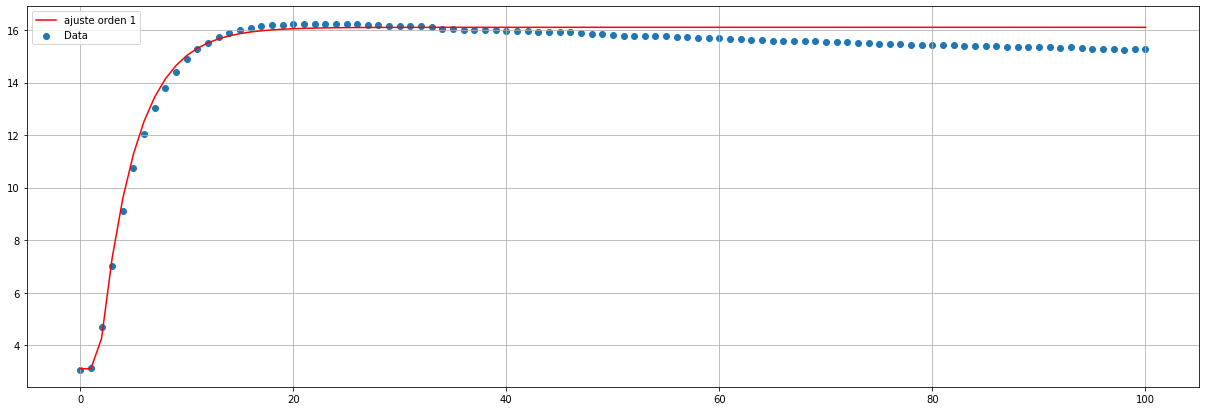

In [18]:
plt.figure(figsize=(21, 7))
plt.scatter(time, salida, label='Data')
plt.plot(time, Y_1orden, color='red', label='ajuste orden 1')
plt.legend(loc='best')
plt.grid(True)

In [19]:
# Se define la función de transferencia del proceso
Gp = control.tf([k], [tau, 1])
Gp


TransferFunction(array([13]), array([3.33404736, 1.        ]))

In [20]:
# Se hallan los polos del proceso
polos = Gp.pole()
polos

array([-0.29993575])

In [21]:
# Se hallan los ceros del proceso
ceros = Gp.zero()
ceros

array([], dtype=float64)

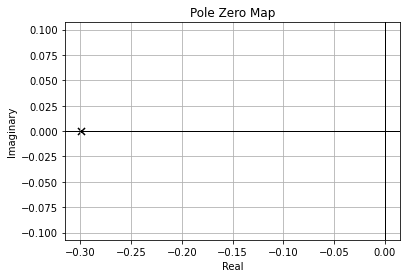

In [22]:
# Se grafica el mapa de polos y ceros
control.pzmap(Gp)
plt.grid(True)